In [10]:
#pip install scikits-bootstrap --user
#pip install pymicro --user
#pip install vtk --user

Basic imports

In [11]:
import psychopy


In [12]:
import os, glob, platform, sys
import numpy as np
import numpy.matlib
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from scipy import *
from matplotlib.pyplot import *

In [2]:
# Importing behavioral data from experiment 
sys_dir = os.path.join('/Users','leenfarah','Desktop')
proj_dir = os.path.join(sys_dir,'wm_prior','SResults')
os.chdir("/Users/leenfarah/Desktop/wm_prior/SResults/")
print(os.getcwd()) 


NameError: name 'os' is not defined

In [3]:
from random import shuffle, sample
from numpy.linalg import norm
import statsmodels.nonparametric.smoothers_lowess as loess
from scipy.io import *
from circ_stats import * 								# File needs to be in the wd
from time import time, sleep

%matplotlib inline

!pip install mne

# mne libraries
import shutil as sh
import mne
from mne.datasets import eegbci
from pymicro.view.vol_utils import compute_affine_transform






__Reading the behavioral data__

Generating paths

In [4]:
#%% FUNCTIONS
def len2(x):
	if type(x) is not type([]):
		if type(x) is not type(array([])):
			return -1
	return len(x)

def circdist(angles1,angles2):
    if len2(angles2) < 0:
        if len2(angles1) > 0:
            angles2 = [angles2]*len(angles1)
        else:
            angles2 = [angles2]
            angles1 = [angles1]
    if len2(angles1) < 0:
        angles1 = [angles1]*len(angles2)
        
    return np.angle(exp(1j*angles1)/exp(1j*angles2))
        
    #return amap(lambda a1,a2: phase2(exp(1j*a1)/exp(1j*a2)), angles1,angles2)

def circ_mean(x):
	return circmean(x,low=-pi,high=pi)

def rem_sys_err(report,target,w):
    n=[]
    for x in arange(-pi,pi,w):
        d=circdist(target,x)
        idx = (d >= x) & (d<x+w)
        report[idx] = circdist(report[idx],circmean(circdist(report[idx],target[idx]),low=-pi,high=pi))
        n.append(sum(idx))
        
    return report,n

def rem_sys_err2(report,target,frac=.25):
    #''' Removes from the response the systematic error of the subject.'''
    fit_resp = loess.lowess(report, target, frac = frac, return_sorted = False)
    fit_error = circdist(fit_resp, target)
    clean_res = circdist(report, fit_error) # Clean response ?
    return clean_res

def circdist(angles1,angles2):       
    return np.angle(np.exp(1j*angles1)/np.exp(1j*angles2))

In [5]:
def vfilter(x, var):
    return x.loc[(abs(x[var] ) < 3*std(abs(x[var] ))) & (abs(x[var] ) > 1)]

In [6]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True, color = 'C0'):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.diff(bins)

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor=color, fill=False, linewidth=1)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

In [7]:
proj_dir

NameError: name 'proj_dir' is not defined

In [8]:
os.path.join(proj_dir,file)

NameError: name 'os' is not defined

In [138]:
 /Users/leenfarah/Desktop/wm_prior/SResults/


Object `` not found.
File `'.py'` not found.


In [15]:
# LEEN DELETE THIS BLOCK AFTER IT WORKS (this is step by step of the block under)
all_df = pd.DataFrame([]) # concatenate all behav subject data together
ddata = pd.DataFrame([]) 

for file in sorted(glob.glob("*.psydat")): 
    subjdata = pd.DataFrame([]) # initialize individual subject data variable container
    pfile =  open(os.path.join(proj_dir,file))
    dat = pickle.load(pfile)
    subjdata = pd.DataFrame([]) # initialize individual subject data variable container
    for block in dat['main_exp']['Exp_blocks']:
        ddata = pd.DataFrame(block['data'])
        ddata.columns = ddata.iloc[0]
        ddata = ddata.iloc[1:,:]
        ddata.reset_index(drop=True, inplace=True)
        subjdata = pd.concat([subjdata, ddata], axis = 0)
    
    
    all_df = pd.concat([all_df, subjdata], axis = 0) #concatenate each new subject
    

# changing the format of the prior column from array to value
all_df.reset_index(drop=True, inplace=True)
for i in range(len(all_df.prior)):
    try:
        all_df.prior[i] = all_df.prior[i][0]
    except:
        pass


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [10]:

all_df = pd.DataFrame([]) # concatenate all behav subject data together
ddata = pd.DataFrame([]) # concatenate here behav data + dv + orientations

for file in sorted(glob.glob("*.psydat")): 
    subjdata = pd.DataFrame([]) # initialize individual subject data variable container
    pfile =  open(os.path.join(results_dir, file),"rb")
    dat = pickle.load(pfile)
    subjdata = pd.DataFrame([]) # initialize individual subject data variable container
    for block in dat['main_exp']['Exp_blocks']:
        ddata = pd.DataFrame(block['data'])
        ddata.columns = ddata.iloc[0]
        ddata = ddata.iloc[1:,:]
        ddata.reset_index(drop=True, inplace=True)
        subjdata = pd.concat([subjdata, ddata], axis = 0)
    
    
    all_df = pd.concat([all_df, subjdata], axis = 0) #concatenate each new subject


# changing the format of the prior column from array to value
all_df.reset_index(drop=True, inplace=True)
for i in range(len(all_df.prior)):
    try:
        all_df.prior[i] = all_df.prior[i][0]
    except:
        pass


# Here I am reaaranging orientations to fall between -180 and 180
all_df['T_Angle'] = all_df['T_Angle'].astype(float)

# remeber to remove the first trial of each block

all_df['preT'] = all_df['T_Angle'].shift(1) 
all_df['preT'] = all_df['preT'].astype(float)

all_df['choiceAngle'] = all_df['choiceAngle'].astype(float)
mask = (all_df['choiceAngle']>180)
df_valid = all_df[mask]
all_df.loc[mask, 'choiceAngle'] = df_valid['choiceAngle'] - 360
mask = (all_df['T_Angle']>180)
df_valid = all_df[mask]
all_df.loc[mask, 'T_Angle'] = df_valid['T_Angle'] - 360


all_df.reset_index(drop=True, inplace=True)

all_df.head(-4)

NameError: name 'pd' is not defined

Filtering data without catchtrials

__Creating bins for data plotting__

breaks = 20 # step size
bins = arange(-180,180+breaks,breaks)
bin_labels = []
for i in arange(len(bins)):
    #bin_labels.append(bins[i]+breaks/2)
    bin_labels.append(bins[i]+breaks/2)
bin_labels = bin_labels[:-1]

In [ ]:
df = all_df[['subj','block','trial','prior','ct','delay','preT','T_Angle','choiceAngle','keypressed','RT']]

# removing preT nan values
df = df.dropna(subset=['preT'])
df = df[df['keypressed'] != 'space']
df.reset_index(drop=True, inplace=True)

df.insert(8, 'preDiff', np.rad2deg(circdist( np.deg2rad(df['preT']),np.deg2rad(df['T_Angle'])))) 
df['preDiff'] = df['preDiff'].astype(float)
df.insert(9, 'err', np.rad2deg(circdist( np.deg2rad(df['choiceAngle']),np.deg2rad(df['T_Angle'])))) 
df['prior'] = df['prior'].astype(float)
#df['bin_Tangle'] = pd.cut(df['T_Angle'], bins=bins, labels = bin_labels)
#df['bin_preDiff'] = pd.cut(df['preDiff'], bins=bins, labels = bin_labels)
#df['bin_err'] = pd.cut(df['err'], bins=bins, labels = bin_labels)
#df['bin_preDiff'] = df['bin_preDiff'].astype(float)


In [87]:
#%% PARAMETERS
flip = False
rm_bias = True
bins = {}
bins['step'] =  pi/50
bins['step_int'] =  pi/2
bins['x'] = arange(-pi,pi-bins['step_int']+bins['step'],bins['step'])


In [88]:
def compute_serial(x, report,target,ref_target,bins,flip=None, rm_bias = False, ref_report=False):
	report = radians(x[report])
	target = radians(x[target])
	if ref_target == 'null':
		ref_target = zeros(len(target))
	else:
		ref_target = radians(x[ref_target])
		
	xxx = bins['x']

	if rm_bias:
		report = rem_sys_err2(array(report),array(target))
		
	# calculating difference between estimates and targets	
	err = circdist(report,target)
	
	# a reference orientation - current cue (e.g. previous, 0 or prior)
	d = circdist(ref_target,target) #

	if ref_report:
		d=circdist(report[:-1],target[1:])
	
	# remove outliers
	idx_clean=(abs(err)<3*std((err))) & (abs(err)<1)
	#idx_clean = idx_clean & (report[1:] !=0)
	
	err=err[idx_clean]
	d=d[idx_clean]
	
	m_err=[]; std_err=[]; count=[]; cis=[]
	if flip:
		err = sign(d)*err
		d=abs(d)
	
	points_idx= []
	
	for t in xxx:
		idx=(d>=t)&(d<=t+bins['step_int'])
		m_err.append(circ_mean(err[idx]))
		std_err.append(circstd(err[idx])/sqrt(sum(idx)))
		#count.append(sum(idx))
		#points_idx.append(idx)
	
	x = xxx #+bins['step_int']
	out = pd.DataFrame([x ,m_err, std_err]).T
	out.columns=['x','m_err','std_err']
	
	return out


__Plotting histograms of T_angles per block types and subjects__ 

In [ ]:
df.subj.unique()

(array([ 3,  2,  3, 13, 12, 17, 18, 23, 18, 11, 10,  6,  2,  0,  0,  2]),
 array([-1.17800787, -0.9894763 , -0.80094473, -0.61241316, -0.42388159,
        -0.23535002, -0.04681845,  0.14171312,  0.33024469,  0.51877626,
         0.70730783,  0.8958394 ,  1.08437097,  1.27290254,  1.46143411,
         1.64996568,  1.83849725]),
 <BarContainer object of 16 artists>)

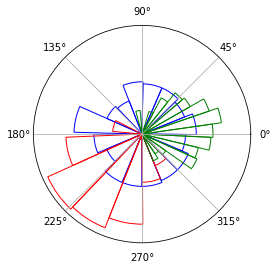

In [30]:
df_subj = df[df['subj'] == 'S02']
priors = df_subj.prior.unique()

angles0 = np.deg2rad(df_subj[df_subj.prior ==  priors[0]].T_Angle)
angles1 = np.deg2rad(df_subj[df_subj.prior ==  priors[1]].T_Angle)
angles2 = np.deg2rad(df_subj[df_subj.prior ==  priors[2]].T_Angle)

# Construct figure and axis to plot on
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))

# Visualise by area of bins
circular_hist(ax, angles0, color = 'blue')
circular_hist(ax, angles1, color = 'red')
circular_hist(ax, angles2, color = 'green')


In [33]:
df.head()


,subj,block,trial,prior,ct,delay,preT,T_Angle,preDiff,err,choiceAngle,keypressed,RT
0,S01,0,1,0.0,True,3000,77.308098,139.469019,-62.160921,9.760981,149.23,None,5.749991
1,S01,0,2,0.0,True,1000,139.469019,78.503047,60.965972,-4.753047,73.75,None,4.33456
2,S01,0,3,0.0,False,3000,78.503047,-111.634428,-169.862525,-9.785572,-121.42,None,4.166987
3,S01,0,4,0.0,False,3000,-111.634428,-163.381749,51.747321,14.151749,-149.23,None,3.150066
4,S01,0,5,0.0,False,1000,-163.381749,-35.046439,-128.335310,-12.623561,-47.67,None,6.366445


In [13]:
test = df.groupby(['subj', 'prior']).apply(compute_serial,'choiceAngle','T_Angle','preT',bins,flip=None, rm_bias = False, ref_report=False)
test.reset_index( inplace=True)
test['abs_err'] = abs(test.m_err)
test.x = rad2deg(test.x+bins['step_int']/2)

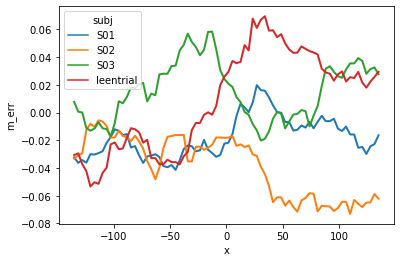

In [16]:
ax = sns.lineplot(data=test[test.prior == 0], x="x", y="m_err",hue = 'subj',linewidth = 2)

In [28]:
test = df.groupby(['subj', 'prior']).apply(compute_serial,'choiceAngle','T_Angle','prior',bins,flip=None, rm_bias = False, ref_report=False)
test.reset_index(inplace=True)
test['abs_err'] = abs(test.m_err)
test.x = rad2deg(test.x+bins['step_int']/2)

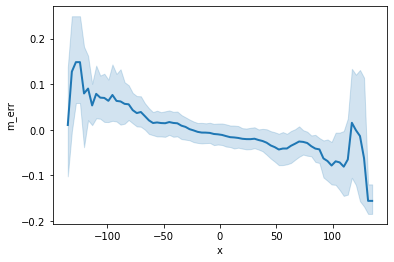

In [29]:
ax = sns.lineplot(data=test[test.prior != 0], x="x", y="m_err",linewidth = 2)

In [24]:
test = df.groupby(['subj', 'prior']).apply(compute_serial,'choiceAngle','T_Angle','null',bins,flip=None, rm_bias = False, ref_report=False)
test.reset_index( inplace=True)
test['abs_err'] = abs(test.m_err)
test.x = rad2deg(test.x+bins['step_int']/2)

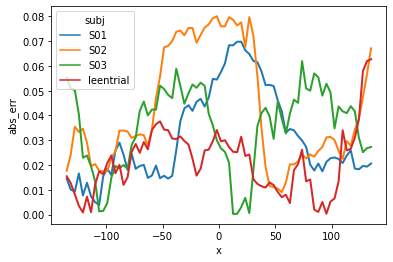

In [27]:
ax = sns.lineplot(data=test[test.prior == 0], x="x", y="abs_err", hue = 'subj', linewidth = 2)

(array([34., 33., 26., 20., 23., 38., 26., 25., 38., 24., 38., 35., 30.,
        37., 36., 37., 34., 43., 33., 46., 48., 45., 41., 50., 56., 56.,
        43., 48., 39., 24., 30., 32., 35., 22., 29., 35., 30., 22., 33.,
        30., 40., 41., 36., 36., 42., 28., 53., 49., 37., 43.]),
 array([-1.79626596e+02, -1.72443527e+02, -1.65260458e+02, -1.58077389e+02,
        -1.50894321e+02, -1.43711252e+02, -1.36528183e+02, -1.29345114e+02,
        -1.22162045e+02, -1.14978976e+02, -1.07795907e+02, -1.00612838e+02,
        -9.34297690e+01, -8.62467001e+01, -7.90636311e+01, -7.18805622e+01,
        -6.46974932e+01, -5.75144243e+01, -5.03313554e+01, -4.31482864e+01,
        -3.59652175e+01, -2.87821485e+01, -2.15990796e+01, -1.44160107e+01,
        -7.23294171e+00, -4.98727742e-02,  7.13319617e+00,  1.43162651e+01,
         2.14993340e+01,  2.86824030e+01,  3.58654719e+01,  4.30485409e+01,
         5.02316098e+01,  5.74146787e+01,  6.45977477e+01,  7.17808166e+01,
         7.89638856e+01,  8.6146

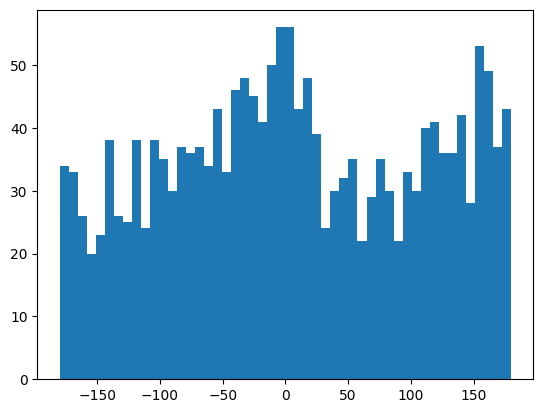

In [65]:
plt.hist((df.T_Angle), bins=50)

[0.97690011 0.00829813 1.024191  ]


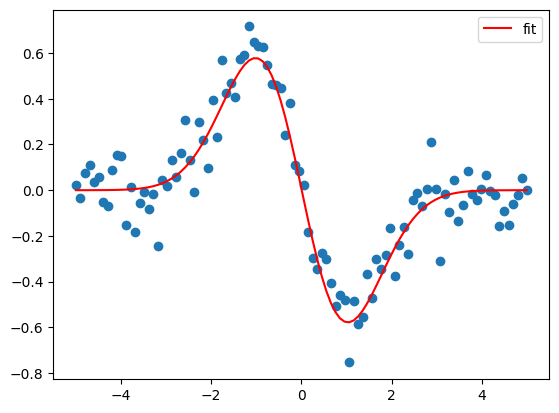

In [36]:
from scipy.optimize import curve_fit

def derivative_gaussian(x, A, mu, sigma):
    return -A * (x - mu) * np.exp(-(x - mu)**2 / (2 * sigma**2)) / sigma**2

# Generate some example data
x_data = np.linspace(-5, 5, 100)
y_data = derivative_gaussian(x_data, 1, 0, 1) + np.random.normal(0, 0.1, 100)

# Fit the function to the data
popt, pcov = curve_fit(derivative_gaussian, x_data, y_data)

# Print the optimized parameters
print(popt)

# Plot the original data and the fitted curve
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)
plt.plot(x_data, derivative_gaussian(x_data, *popt), 'r-', label='fit')
plt.legend()
plt.show()

In [ ]:
compute_serial(df, 'choiceAngle','T_Angle','preT',bins,flip=None, rm_bias = False, ref_report=False)

In [ ]:
report = radians(df.choiceAngle)
target = radians(df.T_Angle)
ref_target = radians(df.preT)

In [ ]:
err = circdist(report,target)
d = circdist(ref_target,target) #a reference orientation - current cue (e.g. previous, 0 or prior)
err = radians(df.err)
d = radians(df.preDiff)
# remove outliers
idx_clean=(abs(err)<3*std((err))) & (abs(err)<1)
#idx_clean = idx_clean & (report[1:] !=0)

err=err[idx_clean]
d=d[idx_clean]
m_err=[]
std_err=[]
count=[]
cis=[]
if flip:
	err = sign(d)*err
	d=abs(d)
points_idx=[]
for t in xxx:
	idx=(d>=t)&(d<=t+w2)
	m_err.append(circ_mean(err[idx]))
	std_err.append(circstd(err[idx])/sqrt(sum(idx)))
	count.append(sum(idx))
	points_idx.append(idx)


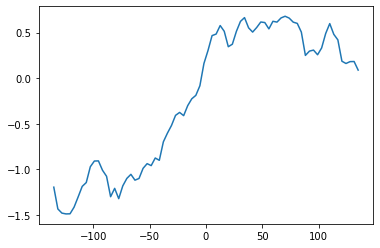

In [ ]:
plt.plot(np.rad2deg(xxx+w2/2),np.rad2deg(m_err))

In [944]:
def circ_stats(dat,x,y): # this function was used to calculate the log linear regression between two vectors
    x = circ_mean(np.deg2rad(dat[x]))
    y = circ_mean(np.deg2rad(dat[y]))
    #std_err = circstd(np.deg2rad(dat[y])) #/sqrt(len(dat[y]))	 'std_err': std_err
    out = pd.DataFrame({'x': x , 'y': y}, index=[0])
    return out 

In [945]:
test = df.groupby(['subj','bin_Tangle']).apply(circ_stats)



TypeError: circ_stats() missing 2 required positional arguments: 'x' and 'y'

In [43]:
#%% PARAMETERS
w1=pi/50
w2=pi/2
xxx=arange(-pi,pi-w2+w1,w1)
flip = False
rm_bias =True

1. Calcula valores de error en funcion de trial anterior para cada triangular
2. Calcula valores en funcion del prior

In [44]:
prior = priors[0]
print(prior)
dat_s = df[(df['subj'] == 'S01') & (df['prior'] == prior)]
dat_s['preT'] = dat_s['T_Angle'].shift(1)
dat_s.reset_index(drop=True, inplace=True)

6.5


In [45]:
dat = dat_s.copy()
#sns.set_context('poster')
T = radians(array(dat['T_Angle']))
R = radians(array(dat['choiceAngle']))
P = radians(array(dat['preT']))


figure(figsize=[5,5])
#plt.subplot(4,1,isubj+1)
xxx=arange(-pi,pi-w2+w1,w1)
flip = False

#REF = P
REF = radians(prior*np.ones(np.shape(R)))
#REF = np.zeros(np.shape(R))

err,d,m_err,std_err,count,points_idx = compute_serial(R,T,REF,xxx,flip,rm_bias,False)


m_err=rad2deg(m_err)
std_err=rad2deg(std_err)

# Plot
plot(rad2deg(xxx+w2/2),m_err,linewidth=1.5)
fill_between(rad2deg(xxx+w2/2), m_err + std_err, m_err - std_err,alpha=.2)
plot(rad2deg(xxx+w2/2),zeros(len(xxx)),"k--",linewidth=1)
xlabel(r'$\theta_{n-1}^S - \theta_n^S$ ($^o$)', fontsize=14); ylabel(r'$\theta_n^e$ ($^o$)', fontsize=14);
sns.despine()


adict={}
adict['m_err']=m_err
adict['std_err']=std_err
adict['xxx']=xxx
adict['w2']=w2

IndexError: arrays used as indices must be of integer (or boolean) type

<Figure size 500x500 with 0 Axes>

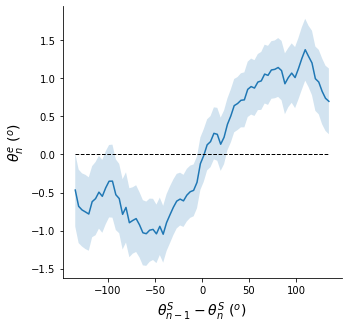

In [674]:
dat = df.copy()
#sns.set_context('poster')
T = radians(array(dat['T_Angle']))
R = radians(array(dat['choiceAngle']))
P = radians(array(dat['preT']))


figure(figsize=[5,5])
#plt.subplot(4,1,isubj+1)
xxx=arange(-pi,pi-w2+w1,w1)
flip = False

REF = P
#REF = radians(prior*np.ones(np.shape(R)))
#REF = np.zeros(np.shape(R))

err,d,m_err,std_err,count,points_idx = compute_serial(R,T,REF,xxx,flip,rm_bias,False)


m_err=rad2deg(m_err)
std_err=rad2deg(std_err)

# Plot
plot(rad2deg(xxx+w2/2),m_err,linewidth=1.5)
fill_between(rad2deg(xxx+w2/2), m_err + std_err, m_err - std_err,alpha=.2)
plot(rad2deg(xxx+w2/2),zeros(len(xxx)),"k--",linewidth=1)
xlabel(r'$\theta_{n-1}^S - \theta_n^S$ ($^o$)', fontsize=14); ylabel(r'$\theta_n^e$ ($^o$)', fontsize=14);
sns.despine()


adict={}
adict['m_err']=m_err
adict['std_err']=std_err
adict['xxx']=xxx
adict['w2']=w2

In [879]:
breaks = 30 # step size
bins = arange(-180,180+breaks,breaks)
bin_labels = []
for i in arange(len(bins)):
    #bin_labels.append(bins[i]+breaks/2)
    bin_labels.append(bins[i]+breaks/2)
bin_labels = bin_labels[:-1]

In [880]:
df = all_df[['subj','block','trial','prior','ct','delay','preT','T_Angle','choiceAngle','keypressed','RT']]
df['bin_Tangle'] = pd.cut(df['T_Angle'], bins=bins, labels = bin_labels)

# removing preT nan values
df = df.dropna(subset=['preT'])
df = df[df['keypressed'] != 'space']


df.insert(8, 'preDiff', np.rad2deg(circdist( np.deg2rad(df['preT']),np.deg2rad(df['T_Angle'])))) 
df.insert(9, 'err', np.rad2deg(circdist( np.deg2rad(df['choiceAngle']),np.deg2rad(df['T_Angle'])))) 

df['bin_preDiff'] = pd.cut(df['preDiff'], bins=bins, labels = bin_labels)
df['bin_err'] = pd.cut(df['err'], bins=bins, labels = bin_labels)
df['bin_preDiff'] = df['bin_preDiff'].astype(float)
df['preDiff'] = df['preDiff'].astype(float)
df.reset_index(drop=True, inplace=True)

/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [873]:
df.head()

,subj,block,trial,prior,ct,delay,preT,T_Angle,preDiff,err,choiceAngle,keypressed,RT,bin_Tangle,bin_preDiff,bin_err
0,Leen,0,1,0,False,1000,-113.216174,-34.676601,-78.539573,1.836601,-32.84,None,2.099349,-37.5,-82.5,7.5
1,Leen,0,2,0,False,3000,-34.676601,102.311261,-136.987861,19.508739,121.82,None,4.450077,97.5,-142.5,22.5
2,Leen,0,3,0,False,1000,102.311261,20.665683,81.645578,-1.505683,19.16,None,2.949058,22.5,82.5,-7.5
3,Leen,0,4,0,False,1000,20.665683,177.726916,-157.061232,4.453084,-177.82,None,1.933458,172.5,-157.5,7.5
4,Leen,0,5,0,False,3000,177.726916,-102.394972,-79.878112,-110.415028,147.19,None,3.899956,-97.5,-82.5,-112.5


In [756]:
def circ_stats(dat,x,y): # this function was used to calculate the log linear regression between two vectors
    ref = np.rad2deg(circ_mean(np.deg2rad(dat[x])))
    pred = np.rad2deg(circ_mean(np.deg2rad(dat[y])))
    std_err = np.rad2deg(circstd(np.deg2rad(dat[y]))) #/sqrt(len(dat[y]))	
    out = pd.DataFrame({'ref': ref , 'pred': pred, 'std_err': std_err}, index=[0])
    return out 

In [874]:
test = df.groupby(['subj','bin_Tangle']).apply(circ_stats, x = 'T_Angle', y = 'err')
test.reset_index(inplace=True)
test['lb'] = test.pred - test.std_err
test['hb'] = test.pred + test.std_err


TypeError: circ_stats() got an unexpected keyword argument 'x'

In [758]:
df.head()

,subj,block,trial,prior,ct,delay,preT,T_Angle,preDiff,err,choiceAngle,keypressed,RT,bin_Tangle,bin_preDiff,bin_err
0,Leen,0,1,0,False,1000,-113.216174,-34.676601,-78.539573,1.836601,-32.84,None,2.099349,-32.5,-77.5,2.5
1,Leen,0,2,0,False,3000,-34.676601,102.311261,-136.987861,19.508739,121.82,None,4.450077,102.5,-137.5,17.5
2,Leen,0,3,0,False,1000,102.311261,20.665683,81.645578,-1.505683,19.16,None,2.949058,22.5,82.5,-2.5
3,Leen,0,4,0,False,1000,20.665683,177.726916,-157.061232,4.453084,-177.82,None,1.933458,177.5,-157.5,2.5
4,Leen,0,5,0,False,3000,177.726916,-102.394972,-79.878112,-110.415028,147.19,None,3.899956,-102.5,-77.5,-112.5


In [875]:
def circ_stats(dat,x,y): # this function was used to calculate the log linear regression between two vectors
    ref = np.rad2deg(circ_mean(np.deg2rad(dat[x])))
    pred = np.rad2deg(circ_mean(np.deg2rad(dat[y])))
    std_err = np.rad2deg(circstd(np.deg2rad(dat[y]))) #/sqrt(len(dat[y]))	
    out = pd.DataFrame({'ref': ref , 'pred': pred, 'std_err': std_err}, index=[0])
    return out 

In [876]:
def circ_stats(dat): # this function was used to calculate the log linear regression between two vectors
    ref = np.rad2deg(circ_mean(np.deg2rad(dat.preDiff)))
    pred = np.rad2deg(circ_mean(np.deg2rad(dat.err)))
    std_err = np.rad2deg(circstd(np.deg2rad(dat.err))) #/sqrt(len(dat[y]))	
    out = pd.DataFrame({'ref': ref , 'pred': pred, 'std_err': std_err}, index=[0])
    return out 

In [881]:
test = df.groupby(['bin_preDiff']).apply(circ_stats)
#test.ref = np.rad2deg(test.ref)
#test.pred = np.rad2deg(test.pred)
test.reset_index(inplace=True)
test['lb'] = test.pred - test.std_err
test['hb'] = test.pred + test.std_err


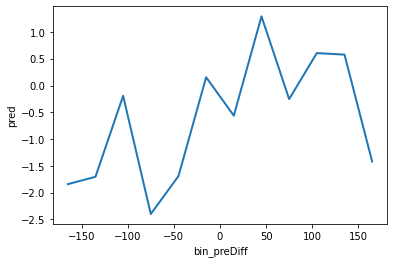

In [882]:
ax = sns.lineplot(data=test, x="bin_preDiff", y="pred",linewidth = 2)

array([-180, -175, -170, -165, -160, -155, -150, -145, -140, -135, -130,
       -125, -120, -115, -110, -105, -100,  -95,  -90,  -85,  -80,  -75,
        -70,  -65,  -60,  -55,  -50,  -45,  -40,  -35,  -30,  -25,  -20,
        -15,  -10,   -5,    0,    5,   10,   15,   20,   25,   30,   35,
         40,   45,   50,   55,   60,   65,   70,   75,   80,   85,   90,
         95,  100,  105,  110,  115,  120,  125,  130,  135,  140,  145,
        150,  155,  160,  165,  170,  175,  180])

In [856]:
df['bin_preDiffbinrads'] = np.deg2rad(df.bin_preDiff)
df['err_rads'] = np.deg2rad(df.err)

In [844]:
df.columns

Index(['subj', 'block', 'trial', 'prior', 'ct', 'delay', 'preT', 'T_Angle',
       'preDiff', 'err', 'choiceAngle', 'keypressed', 'RT', 'bin_Tangle',
       'bin_preDiff', 'bin_err'],
      dtype='object', name=0)

In [853]:
df.bin_preDiffbinrads == t

0        True
1       False
2       False
3       False
4        True
        ...  
1362    False
1363    False
1364    False
1365    False
1366    False
Name: bin_preDiff, Length: 1367, dtype: bool

In [855]:
df[df.bin_preDiffbinrads == t ].err_rads

AttributeError: 'DataFrame' object has no attribute 'err_rads'

In [861]:
xxx

array([-3.14159265e+00, -3.07876080e+00, -3.01592895e+00, -2.95309709e+00,
       -2.89026524e+00, -2.82743339e+00, -2.76460154e+00, -2.70176968e+00,
       -2.63893783e+00, -2.57610598e+00, -2.51327412e+00, -2.45044227e+00,
       -2.38761042e+00, -2.32477856e+00, -2.26194671e+00, -2.19911486e+00,
       -2.13628300e+00, -2.07345115e+00, -2.01061930e+00, -1.94778745e+00,
       -1.88495559e+00, -1.82212374e+00, -1.75929189e+00, -1.69646003e+00,
       -1.63362818e+00, -1.57079633e+00, -1.50796447e+00, -1.44513262e+00,
       -1.38230077e+00, -1.31946891e+00, -1.25663706e+00, -1.19380521e+00,
       -1.13097336e+00, -1.06814150e+00, -1.00530965e+00, -9.42477796e-01,
       -8.79645943e-01, -8.16814090e-01, -7.53982237e-01, -6.91150384e-01,
       -6.28318531e-01, -5.65486678e-01, -5.02654825e-01, -4.39822972e-01,
       -3.76991118e-01, -3.14159265e-01, -2.51327412e-01, -1.88495559e-01,
       -1.25663706e-01, -6.28318531e-02,  4.44089210e-15,  6.28318531e-02,
        1.25663706e-01,  

In [859]:
m_err=[]
std_err=[]
count=[]
cis=[]
if flip:
	err = sign(d)*err
	d=abs(d)
points_idx=[]

for t in df.bin_preDiffbinrads.unique():
	x  =df[df.bin_preDiffbinrads == t ].err_rads
	x.reset_index(drop=True, inplace=True)
	m_err.append(circ_mean(x))
	#idx=(d>=t)&(d<=t+w2)
	#m_err.append(circ_mean(err[idx]))
	#std_err.append(circstd(err[idx])/sqrt(sum(idx)))
	#count.append(sum(idx))
	#points_idx.append(idx)


In [818]:
df.bin_preDiff.unique()

/Users/alex/opt/anaconda3/envs/mne/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


[-77.5, -137.5, 82.5, -157.5, 37.5, ..., -127.5, -167.5, -117.5, 162.5, 27.5]
Length: 72
Categories (72, float64): [-177.5 < -172.5 < -167.5 < -162.5 ... 162.5 < 167.5 < 172.5 < 177.5]

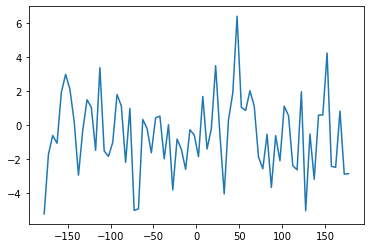

In [860]:
plt.plot(np.unique(df.bin_preDiff ),np.rad2deg(m_err))

In [810]:
df[df.bin_preDiff == t ]

,subj,block,trial,prior,ct,delay,preT,T_Angle,preDiff,err,choiceAngle,keypressed,RT,bin_Tangle,bin_preDiff,bin_err
88,Leen,2,0,57.980777,False,1000,-147.590020,34.889180,177.520800,-4.929180,29.96,None,1.351658,32.5,177.5,-2.5
133,Leen,2,46,57.980777,False,3000,113.498105,-63.558437,177.056542,17.478437,-46.08,None,2.350028,-62.5,177.5,17.5
149,Leen,3,14,57.980777,False,3000,-2.135937,-179.852770,177.716833,-0.407230,179.74,None,1.999258,-177.5,177.5,-2.5
187,Leen,4,7,57.980777,False,1000,-26.263597,153.991639,179.744765,0.378361,154.37,None,3.983155,152.5,177.5,2.5
564,leentest,2,15,[314.7077255793419],False,3000,225.419208,46.779311,178.639897,-10.759311,36.02,None,2.499177,47.5,177.5,-12.5
604,leentest,3,8,[314.7077255793419],False,1000,459.231721,-78.988985,178.220706,2.648985,-76.34,None,4.683176,-77.5,177.5,2.5
632,leentest,3,37,[314.7077255793419],True,3000,170.303146,-5.207308,175.510455,-2.262692,-7.47,None,1.483481,-7.5,177.5,-2.5
636,leentest,3,41,[314.7077255793419],False,1000,437.820940,-102.118188,179.939129,6.398188,-95.72,None,2.100448,-102.5,177.5,7.5
659,leentest,4,14,[314.7077255793419],False,1000,218.561130,39.308258,179.252872,-4.468258,34.84,None,3.466727,37.5,177.5,-2.5
808,leentest,7,26,[179.7077255793419],False,3000,159.869765,-17.966950,177.836715,-8.883050,-26.85,None,1.032882,-17.5,177.5,-7.5


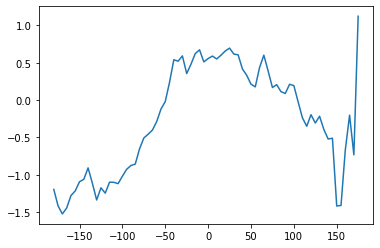

In [ ]:
plt.plot(bins,np.rad2deg(m_err))

In [795]:
t

177.5

In [793]:
np.unique(df.bin_preDiff )

array([-177.5, -172.5, -167.5, -162.5, -157.5, -152.5, -147.5, -142.5,
       -137.5, -132.5, -127.5, -122.5, -117.5, -112.5, -107.5, -102.5,
        -97.5,  -92.5,  -87.5,  -82.5,  -77.5,  -72.5,  -67.5,  -62.5,
        -57.5,  -52.5,  -47.5,  -42.5,  -37.5,  -32.5,  -27.5,  -22.5,
        -17.5,  -12.5,   -7.5,   -2.5,    2.5,    7.5,   12.5,   17.5,
         22.5,   27.5,   32.5,   37.5,   42.5,   47.5,   52.5,   57.5,
         62.5,   67.5,   72.5,   77.5,   82.5,   87.5,   92.5,   97.5,
        102.5,  107.5,  112.5,  117.5,  122.5,  127.5,  132.5,  137.5,
        142.5,  147.5,  152.5,  157.5,  162.5,  167.5,  172.5,  177.5])

,subj,block,trial,prior,ct,delay,preT,T_Angle,preDiff,err,choiceAngle,keypressed,RT,bin_Tangle,bin_preDiff,bin_err
88,Leen,2,0,57.980777,False,1000,-147.590020,34.889180,177.520800,-4.929180,29.96,None,1.351658,32.5,177.5,-2.5
133,Leen,2,46,57.980777,False,3000,113.498105,-63.558437,177.056542,17.478437,-46.08,None,2.350028,-62.5,177.5,17.5
149,Leen,3,14,57.980777,False,3000,-2.135937,-179.852770,177.716833,-0.407230,179.74,None,1.999258,-177.5,177.5,-2.5
187,Leen,4,7,57.980777,False,1000,-26.263597,153.991639,179.744765,0.378361,154.37,None,3.983155,152.5,177.5,2.5
564,leentest,2,15,[314.7077255793419],False,3000,225.419208,46.779311,178.639897,-10.759311,36.02,None,2.499177,47.5,177.5,-12.5
604,leentest,3,8,[314.7077255793419],False,1000,459.231721,-78.988985,178.220706,2.648985,-76.34,None,4.683176,-77.5,177.5,2.5
632,leentest,3,37,[314.7077255793419],True,3000,170.303146,-5.207308,175.510455,-2.262692,-7.47,None,1.483481,-7.5,177.5,-2.5
636,leentest,3,41,[314.7077255793419],False,1000,437.820940,-102.118188,179.939129,6.398188,-95.72,None,2.100448,-102.5,177.5,7.5
659,leentest,4,14,[314.7077255793419],False,1000,218.561130,39.308258,179.252872,-4.468258,34.84,None,3.466727,37.5,177.5,-2.5
808,leentest,7,26,[179.7077255793419],False,3000,159.869765,-17.966950,177.836715,-8.883050,-26.85,None,1.032882,-17.5,177.5,-7.5


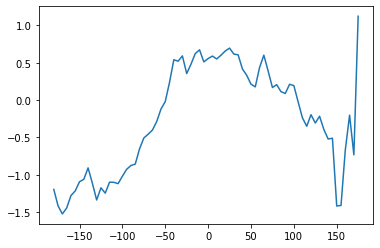

In [780]:
plt.plot(bins,np.rad2deg(m_err))

In [735]:
test

,bin_preDiff,level_1,ref,pred,std_err,lb,hb
0,-177.5,0,-1.635809,0.009201,0.143899,-0.134698,0.153100
1,-172.5,0,-0.237827,-0.024669,0.098152,-0.122821,0.073482
2,-167.5,0,-1.156559,-0.043282,0.198894,-0.242176,0.155612
3,-162.5,0,-1.989825,-0.032031,0.169742,-0.201774,0.137711
4,-157.5,0,-1.525491,-0.018596,0.204696,-0.223292,0.186101
...,...,...,...,...,...,...,...
67,157.5,0,1.971875,-0.055526,0.158011,-0.213537,0.102485
68,162.5,0,-1.966910,-0.050241,0.150453,-0.200694,0.100212
69,167.5,0,-0.410829,0.018258,0.082540,-0.064283,0.100798
70,172.5,0,-0.915080,-0.036624,0.111282,-0.147905,0.074658


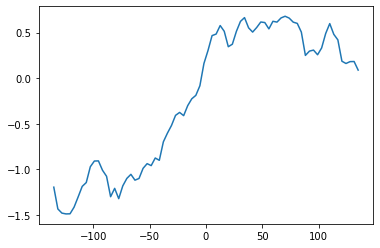

In [ ]:
plt.plot(np.rad2deg(xxx+w2/2),np.rad2deg(m_err))

In [698]:
df

,subj,block,trial,prior,ct,delay,preT,T_Angle,preDiff,err,choiceAngle,keypressed,RT,bin_Tangle,bin_preDiff,bin_err
0,Leen,0,1,0,False,1000,-113.216174,-34.676601,-78.539573,1.836601,-32.84,None,2.099349,-30.0,-70.0,10.0
1,Leen,0,2,0,False,3000,-34.676601,102.311261,-136.987861,19.508739,121.82,None,4.450077,110.0,-130.0,10.0
2,Leen,0,3,0,False,1000,102.311261,20.665683,81.645578,-1.505683,19.16,None,2.949058,30.0,90.0,-10.0
3,Leen,0,4,0,False,1000,20.665683,177.726916,-157.061232,4.453084,-177.82,None,1.933458,170.0,-150.0,10.0
4,Leen,0,5,0,False,3000,177.726916,-102.394972,-79.878112,-110.415028,147.19,None,3.899956,-110.0,-70.0,-110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,leentrial,9,45,154.8,False,1000,129.345173,-176.498824,-54.156003,9.778824,-166.72,None,3.883614,-170.0,-50.0,10.0
1363,leentrial,9,46,154.8,False,1000,-176.498824,129.439470,54.061706,18.530530,147.97,None,2.800078,130.0,50.0,10.0
1364,leentrial,9,47,154.8,False,3000,129.439470,111.157549,18.281921,-1.237549,109.92,None,1.515985,110.0,10.0,-10.0
1365,leentrial,9,48,154.8,False,3000,111.157549,155.383656,-44.226107,8.896344,164.28,None,2.800341,150.0,-50.0,10.0


In [186]:

dat = df[(df['subj'] == 'leentrial')]
dat['prior'].unique()

array([0, -70.2, 154.8], dtype=object)

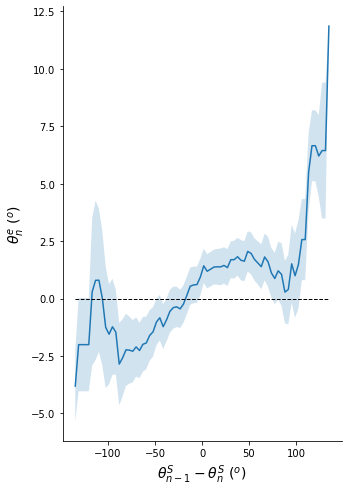

In [245]:
dat = df[(df['subj'] == 'leentrial')]
dat = dat[(dat['prior'] == -70.2)]

dat.reset_index(drop=True, inplace=True)

radius = np.sqrt(np.mean(dat.choice_x**2+dat.choice_y**2))
ref_points = np.array([[radius*np.cos(np.deg2rad(dat.T_Angle.iloc[i])), radius*np.sin(np.deg2rad(dat.T_Angle.iloc[i]))] for i in range(len(dat))])
tsr_points = np.array([[dat.choice_x.iloc[j], dat.choice_y.iloc[j]] for j in range(len(dat))])
translation, transformation = compute_affine_transform(ref_points, tsr_points)
ref_centroid = np.mean(ref_points, axis=0)
tsr_centroid = np.mean(tsr_points, axis=0)
new_points = np.empty_like(ref_points)
for j in range(len(dat)):
    new_points[j] = ref_centroid + np.dot(transformation, tsr_points[j] - tsr_centroid)

dat['choiceAngle_corr'] = np.rad2deg(np.arctan2(new_points[:,1], new_points[:,0]))

#sns.set_context('poster')
T = radians(array(dat['T_Angle']))
R = radians(array(dat['choiceAngle']))
P = radians(array(dat['preT']))


figure(figsize=[5,8])
#plt.subplot(4,1,isubj+1)
xxx=arange(-pi,pi-w2+w1,w1)
flip = False
#%%
#figure(figsize=(10,8))
#err,d,m_err,std_err,count,points_idx = compute_serial(R,T,xxx,flip,False)
err,d,m_err,std_err,count,points_idx = compute_serial(R,T,P,xxx,flip,False)
#err,d,m_err,std_err,count,points_idx = compute_serial(R,T,np.zeros(np.shape(R)),xxx,flip,False)
#err,d,m_err,std_err,count,points_idx = compute_serial(R,T,P,xxx,flip,False)

m_err=rad2deg(m_err)
std_err=rad2deg(std_err)

plot(rad2deg(xxx+w2/2),m_err,linewidth=1.5)
fill_between(rad2deg(xxx+w2/2), m_err + std_err, m_err - std_err,alpha=.2)
#errorbar(xxx+w2/2,m_err,std_err)
plot(rad2deg(xxx+w2/2),zeros(len(xxx)),"k--",linewidth=1)

xlabel(r'$\theta_{n-1}^S - \theta_n^S$ ($^o$)', fontsize=14); ylabel(r'$\theta_n^e$ ($^o$)', fontsize=14);
sns.despine()


adict={}
adict['m_err']=m_err
adict['std_err']=std_err
adict['xxx']=xxx
adict['w2']=w2

In [ ]:

figure(figsize=[5,8])
#plt.subplot(4,1,isubj+1)
xxx=arange(-pi,pi-w2+w1,w1)
flip = False
#%%
#figure(figsize=(10,8))
#err,d,m_err,std_err,count,points_idx = compute_serial(R,T,xxx,flip,False)
err,d,m_err,std_err,count,points_idx = compute_serial(R,T,np.zeros(np.shape(R)),xxx,flip,False)
#err,d,m_err,std_err,count,points_idx = compute_serial(R,T,P,xxx,flip,False)

m_err=rad2deg(m_err)
std_err=rad2deg(std_err)

plot(rad2deg(xxx+w2/2),m_err,linewidth=1.5)
fill_between(rad2deg(xxx+w2/2), m_err + std_err, m_err - std_err,alpha=.2)
#errorbar(xxx+w2/2,m_err,std_err)
plot(rad2deg(xxx+w2/2),zeros(len(xxx)),"k--",linewidth=1)

xlabel(r'$\theta_{n-1}^S - \theta_n^S$ ($^o$)', fontsize=14); ylabel(r'$\theta_n^e$ ($^o$)', fontsize=14);
sns.despine()


adict={}
adict['m_err']=m_err
adict['std_err']=std_err
adict['xxx']=xxx
adict['w2']=w2